In [66]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Generate random data
def generate_data(n_samples=100, n_features=10):
    data, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=5, cluster_std=1.0, random_state=42)
    return data

data = generate_data()

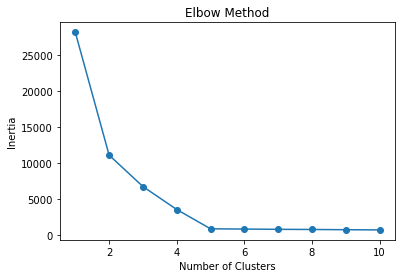

Optimal number of clusters determined by Elbow Method: 8


In [68]:
# Determine the optimal number of clusters using the Elbow Method
def determine_optimal_clusters(data, max_k=10):
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure()
    plt.plot(range(1, max_k + 1), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()
    
    # Return the optimal number of clusters based on the elbow point
    optimal_k = np.argmax(np.diff(inertia)) + 2  # Adding 2 because diff reduces the length by 1
    return optimal_k

optimal_k = determine_optimal_clusters(data)
print(f'Optimal number of clusters determined by Elbow Method: {optimal_k}')

In [69]:
# Initial clustering with optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=5, random_state=42)

In [70]:
# Dynamic clustering with optimal number of clusters
def update_clusters(kmeans, new_data):
    # Append new data to the existing data
    updated_data = np.vstack([kmeans.cluster_centers_, new_data])
    
    # Refit the KMeans model with the updated data
    kmeans = KMeans(n_clusters=kmeans.n_clusters, random_state=42)
    kmeans.fit(updated_data)
    
    return kmeans

In [71]:
def user_accepts_prediction():
    # Simulate user interaction (for POC, randomly accept or decline)
    return np.random.choice([True, False])

In [72]:
def process_new_data(kmeans, new_data):
    # Predict the cluster for new data
    predictions = kmeans.predict(new_data)
    
    # For each new data point, ask the user to accept or decline the prediction
    feedback_data = []
    feedback_labels = []
    
    for i, data_point in enumerate(new_data):
        prediction = predictions[i]
        print(f"Data Point: {data_point}, Predicted Cluster: {prediction}")
        
        if user_accepts_prediction():
            print("User accepted the prediction.")
            feedback_data.append(data_point)
            feedback_labels.append(prediction)
        else:
            print("User declined the prediction.")
            # Handle declined prediction (e.g., consider it as a potential new cluster)
            new_cluster_center = data_point
            feedback_data.append(new_cluster_center)
            feedback_labels.append(len(set(kmeans.labels_)) + 1)
    
    return np.array(feedback_data), np.array(feedback_labels)

In [73]:
# Simulate new incoming data
new_data = generate_data(n_samples=10)

In [74]:
# Process new data and get user feedback
feedback_data, feedback_labels = process_new_data(kmeans, new_data)

Data Point: [ 0.7355263  -7.01016285 -9.04168266  8.17543348  9.15135495  6.57199782
 -2.02153872 -7.87197991  3.94221092 -1.27139604], Predicted Cluster: 2
User accepted the prediction.
Data Point: [-10.06748435   9.21253807   5.54251784  -6.94942441  -5.55097483
  -4.97566977  -3.98716526   1.49866153  -0.9994636   -4.82053695], Predicted Cluster: 4
User declined the prediction.
Data Point: [ 2.01738601 -6.85301022 -2.67921298 -3.19103335 -1.68709392  5.20176218
 -5.09112224  0.61343988  1.31853117 -8.55772431], Predicted Cluster: 3
User declined the prediction.
Data Point: [ 2.33413544 -6.2414778  -4.85916012 -3.00042528 -1.27070847  4.24000428
 -5.71040408  0.54574404  1.85340483 -9.30557888], Predicted Cluster: 3
User declined the prediction.
Data Point: [-2.18511365  8.62920385  3.96295684  2.58484597 -5.84862767 -5.94882947
 -9.67754528  7.01431054  2.35356367  5.13699668], Predicted Cluster: 1
User declined the prediction.
Data Point: [-1.77073104  9.18565441  4.52423055  1.672

In [75]:
# Update clusters with user feedback
def retrain_model_with_feedback(kmeans, feedback_data, feedback_labels):
    # Combine existing data with feedback data
    combined_data = np.vstack([data, feedback_data])
    combined_labels = np.hstack([kmeans.labels_, feedback_labels])
    
    # Refit the KMeans model with combined data
    kmeans = KMeans(n_clusters=len(set(combined_labels)), random_state=42)
    kmeans.fit(combined_data)
    
    return kmeans, combined_data, combined_labels

kmeans, combined_data, combined_labels = retrain_model_with_feedback(kmeans, feedback_data, feedback_labels)

In [76]:
# Measure the silhouette score
sil_score = silhouette_score(data, kmeans.labels_[:len(data)])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.6352461212677395


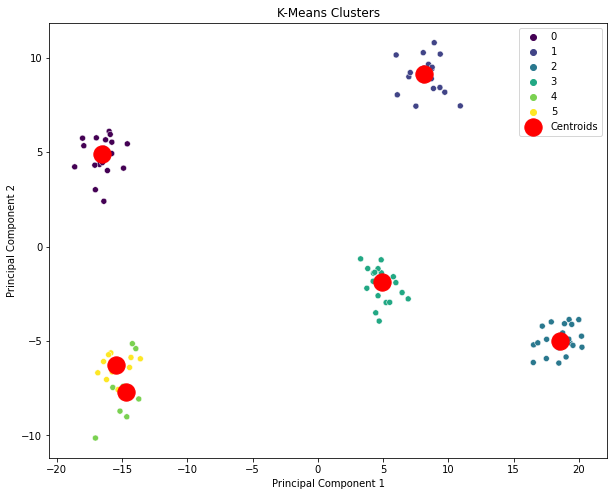

In [77]:
# Dimensionality reduction for visualization
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data)

# Plotting K-Means clusters
def plot_kmeans_clusters(data, kmeans, data_reduced):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data_reduced[:, 0], y=data_reduced[:, 1], hue=kmeans.labels_[:len(data)], palette='viridis')
    reduced_centers = pca.transform(kmeans.cluster_centers_)
    plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], s=300, c='red', label='Centroids')
    plt.title('K-Means Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

plot_kmeans_clusters(data, kmeans, data_reduced)